In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.insert(0,'../..')
import omama as O
import pickle
from hyperopt import hp, rand, fmin, Trials
from pyod.models.hbos import HBOS

In [3]:
# load data and labels

with open('/raid/mpsych/datasetBSTAR.pkl','rb') as f:
    datasetA = pickle.load(f)
    
with open('/raid/mpsych/datasetBSTAR_labels.pkl', 'rb') as f1:
    labels = np.asarray(pickle.load(f1))

In [4]:
# determine the hyperparameter space

param_grid = {
    'contamination': hp.uniform('contamination', 0.07, .1),
    'n_bins': hp.uniformint('n_bins', 1, 50),
    'alpha': hp.uniform('alpha', 0.0, 1.0),
    'tol': hp.uniform('tol', 0.0, 1.0),
}

In [5]:
# def opt(params):
#     param_dict = {
#         'contamination': params['contamination'],
#         'n_clusters': int(params['n_clusters']),
#         'alpha': params['alpha'],
#         'beta': params['beta'],
#         'use_weights': params['use_weights'],
#         'check_estimator': params['check_estimator'],
#         'n_jobs': int(params['n_jobs']),
#         'clustering_estimator': params['clustering_estimator'],
#     }
#     clf = self.algorithm(**params)
#     clf.fit(self.X_train, self.y_train)
    
#     score = -cross_val_score(clf,
#                              self.X_train,
#                              self.y_train,
#                              cv=self.cv,
#                              n_jobs=self.n_jobs,
#                              scoring=self.scoring).mean()

In [5]:
hyperOpt = O.HyperTuner(
    algorithm=HBOS,
    param_space=param_grid,
    feature_type='hist',
    norm_type='gaussian',
    data=datasetA,
    gt_labels=labels,
    max_evals=60,
)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:20<00:00,  2.99trial/s, best loss: -0.9425000000000001]
Best parameters:
alpha: 0.869355916285306
contamination: 0.07245240825856468
n_bins: 50.0
tol: 0.6990785947415082


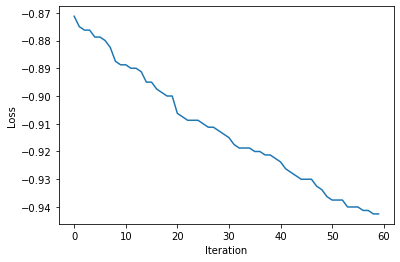

In [6]:
hyperOpt.optimize()

In [10]:
hyperOpt.display_best_params()

Best parameters:
alpha: 0.869355916285306
contamination: 0.07245240825856468
n_bins: 50.0
tol: 0.6990785947415082


In [11]:
hyperOpt.print_param_space()

Parameter space:
contamination: ['0.07', '0.1']
n_bins: ['1', '50', '1.0']
alpha: ['0.0', '1.0']
tol: ['0.0', '1.0']


In [12]:
print(type(hyperOpt.param_space))

<class 'dict'>
